In [65]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import glob
sns.set(style = 'ticks')
sns.set(rc={'figure.figsize':(15,10)})

In [9]:
data = pd.read_csv("train.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26916 entries, 0 to 26915
Data columns (total 12 columns):
country              26916 non-null object
year                 26916 non-null int64
sex                  26916 non-null object
age                  26916 non-null object
suicides_no          26916 non-null int64
population           26916 non-null int64
suicides_100k_pop    26916 non-null float64
country_year         26916 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         26916 non-null object
gdp_per_capital      26916 non-null int64
generation           26916 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
# data.dropna(inplace=True)
# data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 72 to 26915
Data columns (total 12 columns):
country              8364 non-null object
year                 8364 non-null int64
sex                  8364 non-null object
age                  8364 non-null object
suicides_no          8364 non-null int64
population           8364 non-null int64
suicides_100k_pop    8364 non-null float64
country_year         8364 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         8364 non-null object
gdp_per_capital      8364 non-null int64
generation           8364 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 849.5+ KB


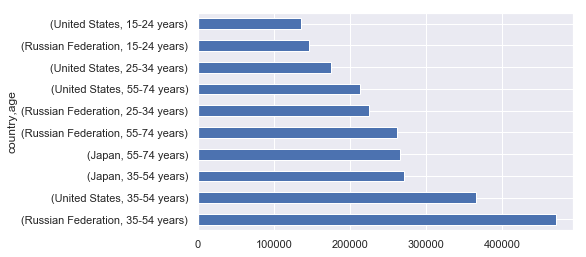

In [13]:
data.groupby(['country','age']).suicides_no.sum().nlargest(10).plot('barh')

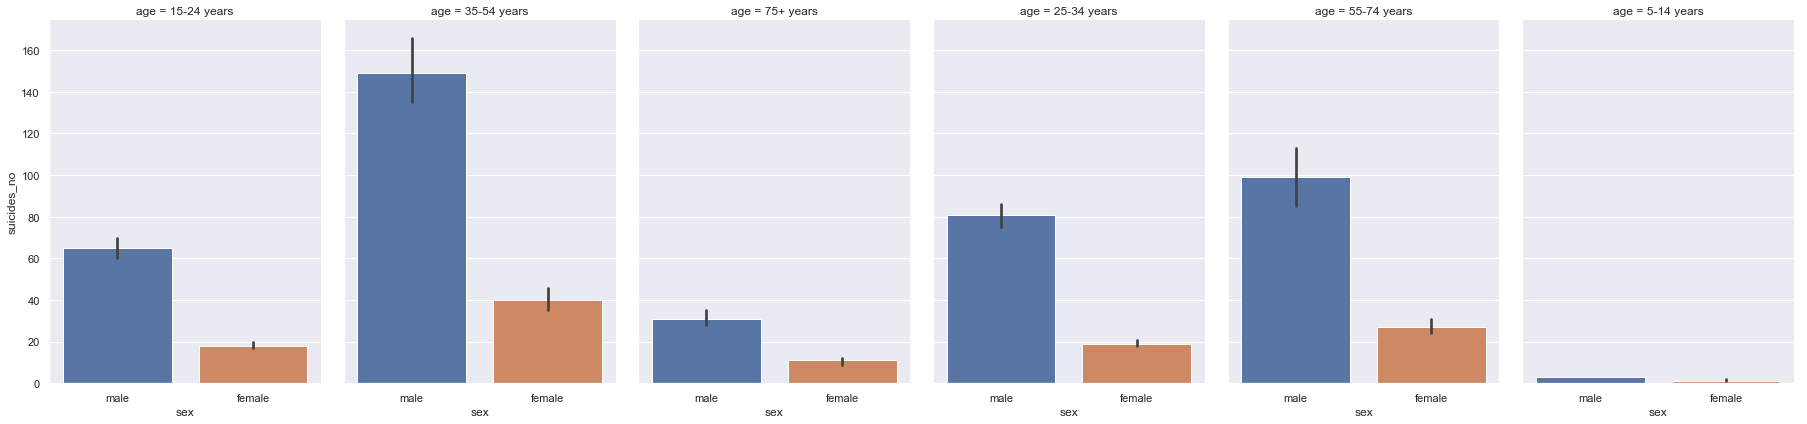

In [29]:
from numpy import median
sns.catplot(x='sex',y='suicides_no',col='age',data = data, estimator = median, height = 6, aspect =.7, kind='bar')

In [21]:
data.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [23]:
data.age = data.age.astype(pd.api.types.CategoricalDtype(categories = data.age.unique()))

In [25]:
data.pivot_table(index='age',columns='sex',values='suicides_no',aggfunc=sum)

sex,female,male
age,,
15-24 years,170170,615336
35-54 years,489125,1885952
75+ years,214938,413209
25-34 years,202185,887539
55-74 years,416036,1184104
5-14 years,16304,34279


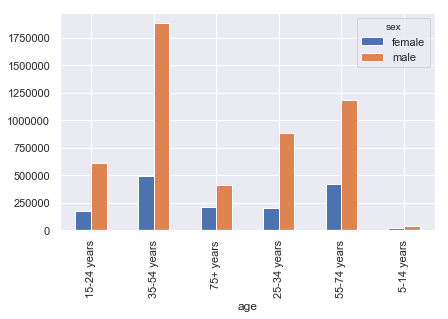

In [28]:
data.pivot_table(index='age',columns='sex',values='suicides_no',aggfunc=sum).plot(kind='bar')

In [40]:
data.groupby(['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')

,age,sex,value
0,15-24 years,female,170170
1,35-54 years,female,489125
2,75+ years,female,214938
3,25-34 years,female,202185
4,55-74 years,female,416036
5,5-14 years,female,16304
6,15-24 years,male,615336
7,35-54 years,male,1885952
8,75+ years,male,413209
9,25-34 years,male,887539


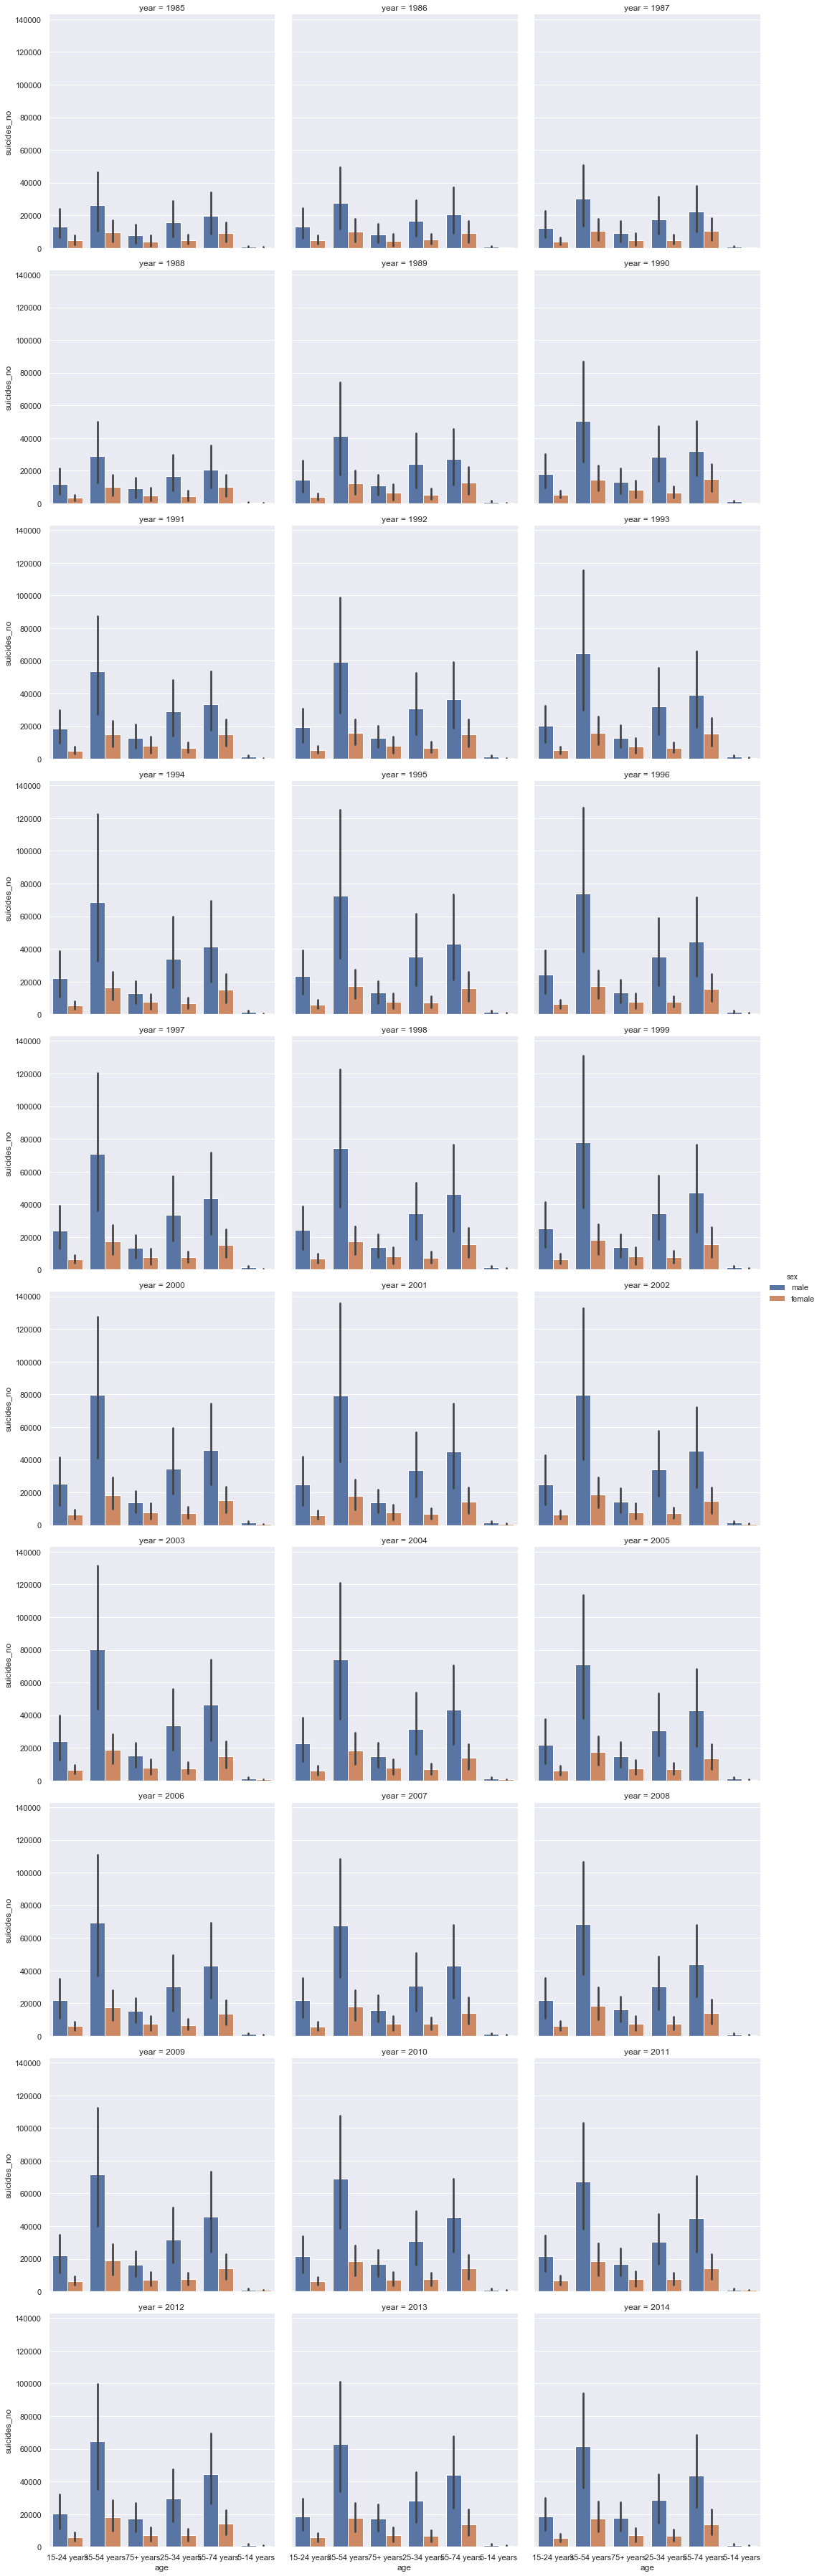

In [44]:
sns.catplot('age','suicides_no',col='year',hue='sex', data = data, kind='bar',col_wrap=3, estimator=sum)

In [47]:
from matplotlib.colors import LogNorm
df = data.groupby(['year','age']).suicides_no.sum().reset_index()

In [49]:
df.age = df.age.astype(pd.api.types.CategoricalDtype(categories = df.age.unique()))

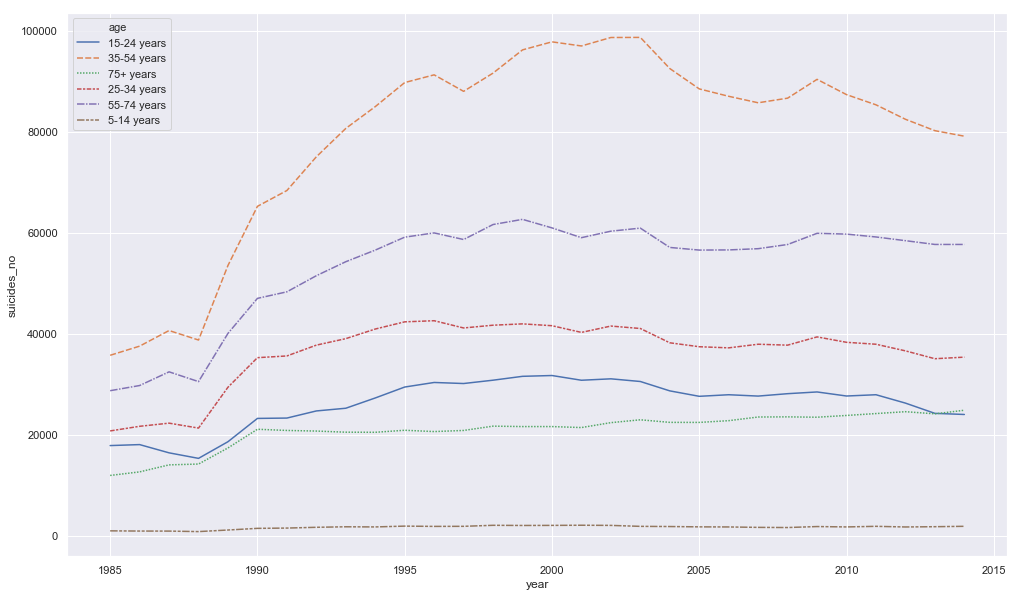

In [52]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data = df, hue_norm = LogNorm(), sort=False)

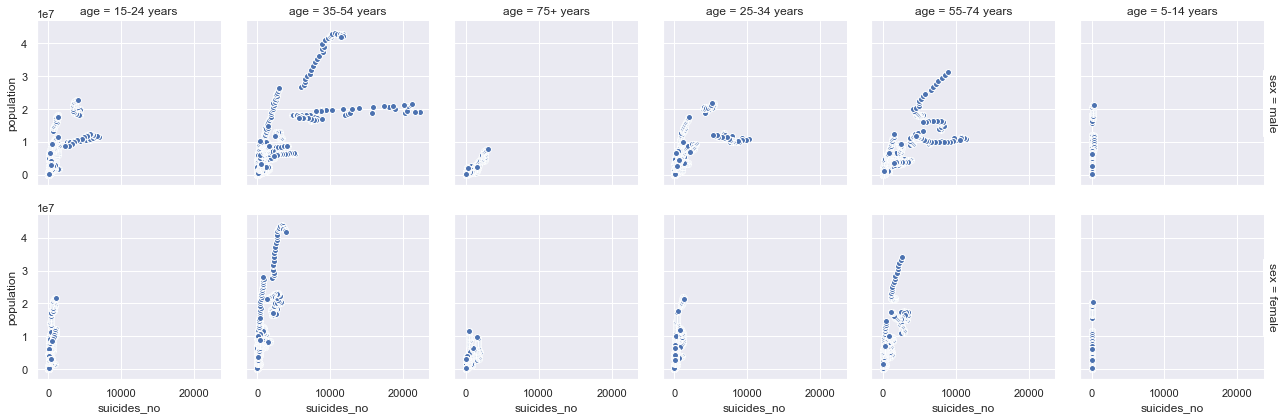

In [55]:
g = sns.FacetGrid(data, row='sex', col = 'age', margin_titles = True)
g.map(plt.scatter, 'suicides_no', 'population', edgecolor = 'w')

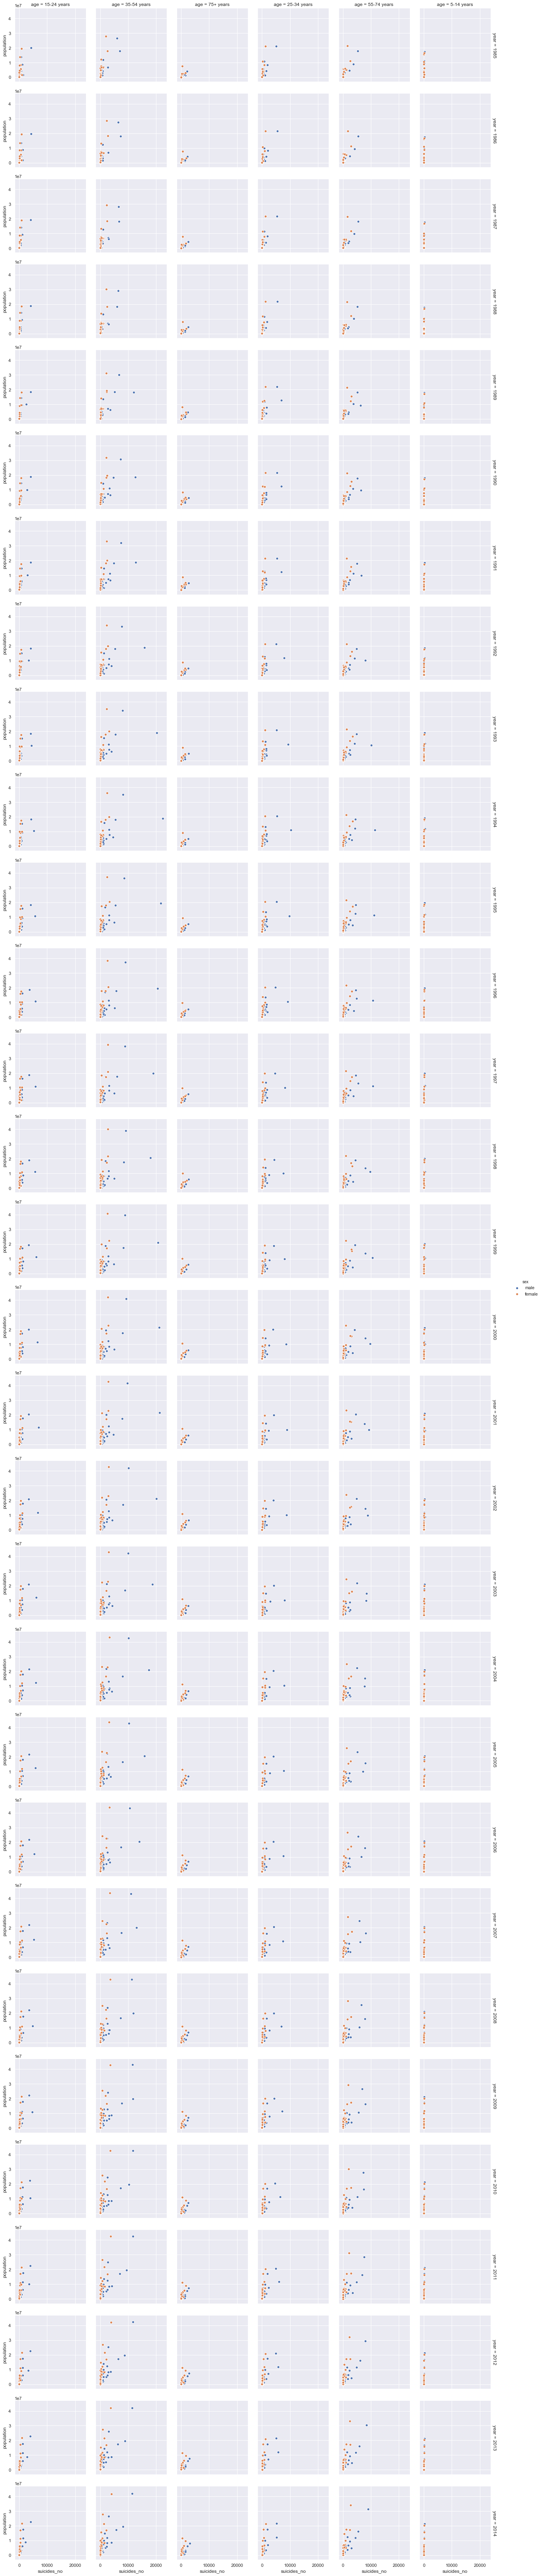

In [56]:
g = sns.FacetGrid(data, row='year', col = 'age', hue = 'sex', margin_titles=True)
(g.map(plt.scatter, 'suicides_no', 'population',edgecolor = 'w')).add_legend()

In [59]:
p = pd.crosstab(index = data.country, columns = data.year, 
                values = data.suicides_no, aggfunc=sum)
# 여기는 왜 한 거지? 국가 간 사망률 연관성을 보려고 했나?
p

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,73.0,63.0,68.0,NaN,NaN,47.0,73.0,50.0,...,0.0,0.0,124.0,160.0,0.0,96.0,NaN,NaN,NaN,NaN
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
Argentina,1988.0,2284.0,2286.0,2354.0,2247.0,2140.0,1951.0,2184.0,2230.0,2241.0,...,3058.0,3108.0,2946.0,3059.0,2884.0,2943.0,2912.0,3248.0,2987.0,3231.0
Armenia,NaN,NaN,NaN,NaN,NaN,93.0,80.0,83.0,106.0,112.0,...,NaN,78.0,71.0,63.0,53.0,73.0,67.0,79.0,67.0,58.0
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,9.0,8.0,4.0,4.0,7.0,9.0,NaN,NaN,NaN
Australia,1861.0,2044.0,2164.0,2172.0,2066.0,2202.0,2288.0,2251.0,2038.0,2283.0,...,NaN,2117.0,2229.0,2341.0,2337.0,2420.0,2392.0,2580.0,2608.0,2891.0
Austria,2091.0,2139.0,2069.0,1851.0,1898.0,1825.0,1769.0,1759.0,1704.0,1776.0,...,1399.0,1297.0,1285.0,1267.0,1278.0,1264.0,1288.0,1276.0,1291.0,1314.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,114.0,134.0,144.0,119.0,47.0,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bahamas,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,7.0,3.0,...,4.0,2.0,5.0,4.0,6.0,10.0,4.0,5.0,5.0,NaN


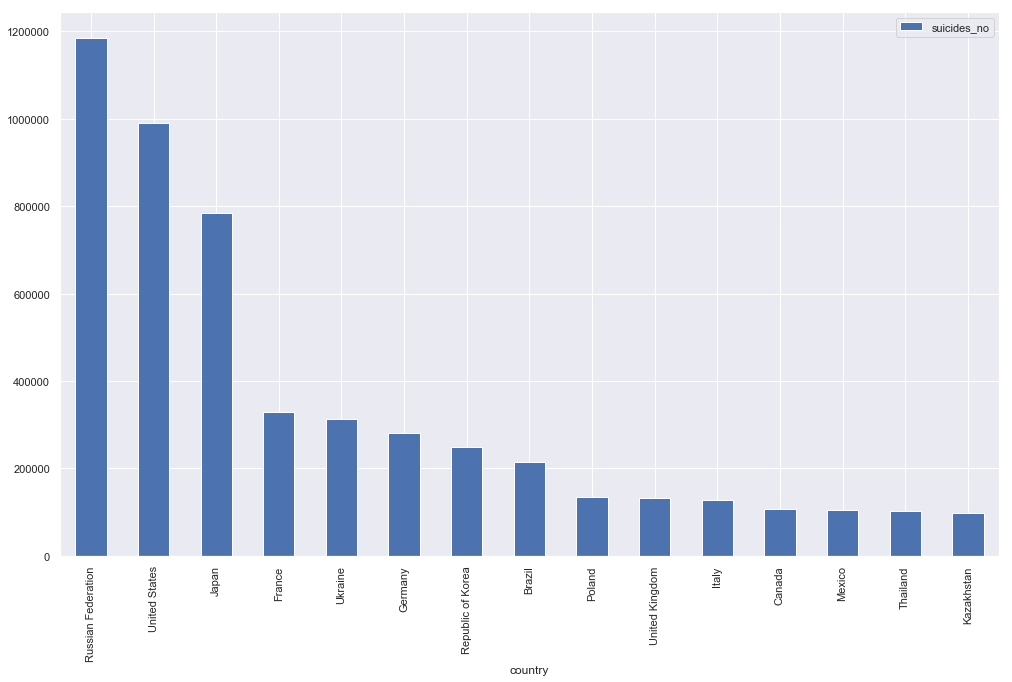

In [63]:
data.groupby(['country']).suicides_no.sum().reset_index().sort_values('suicides_no',ascending=False).head(15).plot(x='country',y='suicides_no',kind='bar')

In [66]:
glob.glob("*.*")

['Kaggle_suicide_predict.ipynb',
 'sample.csv',
 'train.csv',
 'test_mini.csv',
 'mini_project.ipynb']

In [67]:
pd.read_csv("test_mini.csv")

,country,year,sex,age,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Antigua and Barbuda,2015,female,55-74 years,6403,15.62,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers
1,Antigua and Barbuda,2015,female,15-24 years,8561,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
2,Antigua and Barbuda,2015,female,25-34 years,7740,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
3,Antigua and Barbuda,2015,female,35-54 years,15323,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
4,Antigua and Barbuda,2015,female,5-14 years,8239,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z
5,Antigua and Barbuda,2015,female,75+ years,1724,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Silent
6,Antigua and Barbuda,2015,male,15-24 years,8331,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
7,Antigua and Barbuda,2015,male,25-34 years,7059,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
8,Antigua and Barbuda,2015,male,35-54 years,13370,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
9,Antigua and Barbuda,2015,male,5-14 years,8268,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z
